In [43]:
#Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


In [44]:
# Loading dataset
wine=pd.read_csv("winequality-red.csv")

wine.head()

In [45]:
(wine['quality']==5).sum()

np.int64(681)

In [46]:
wine['quality'].value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [47]:
wine.isnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [48]:
# Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Let's do some plotting to know how the data columns are distributed in the dataset


<Axes: xlabel='quality', ylabel='fixed acidity'>

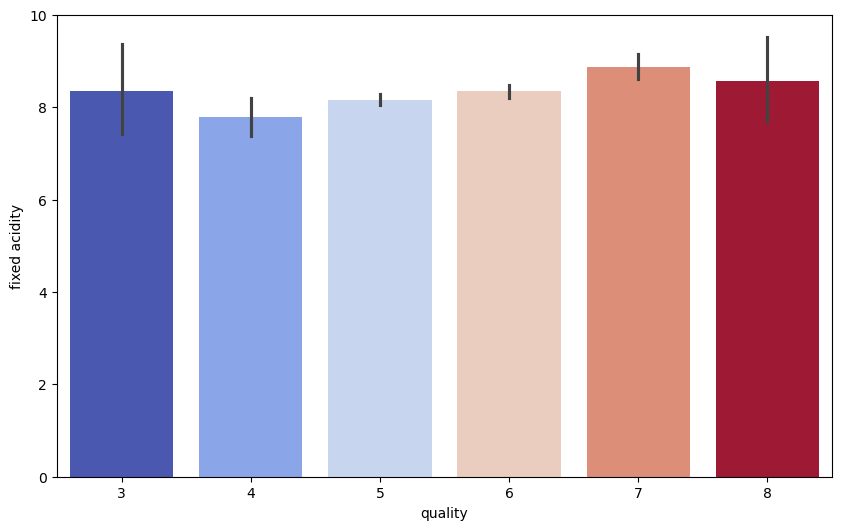

In [49]:
# Here we see that fixed acidity does not give any specification to classify the quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality",y="fixed acidity",data=wine,hue='quality',legend=False,palette='coolwarm')
# This feature is useless

<Axes: xlabel='quality', ylabel='volatile acidity'>

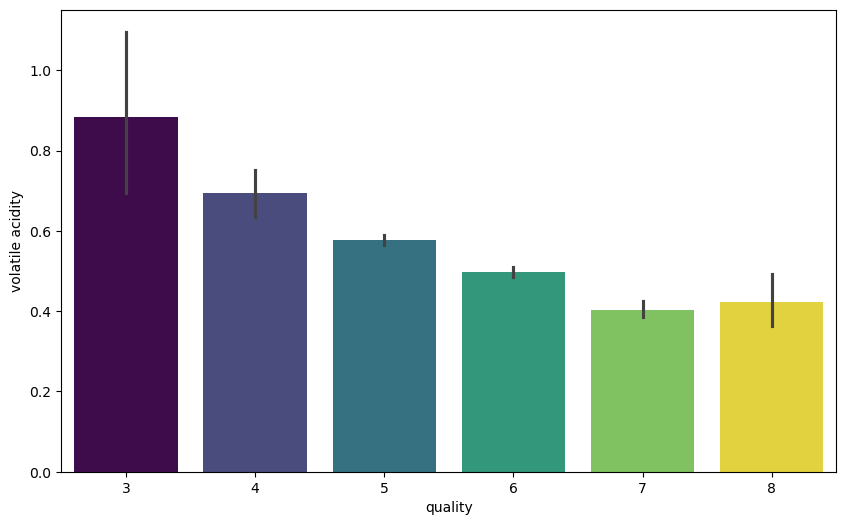

In [50]:
# Here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality",y="volatile acidity",data=wine,hue='quality',legend=False,palette='viridis')

<Axes: xlabel='quality', ylabel='citric acid'>

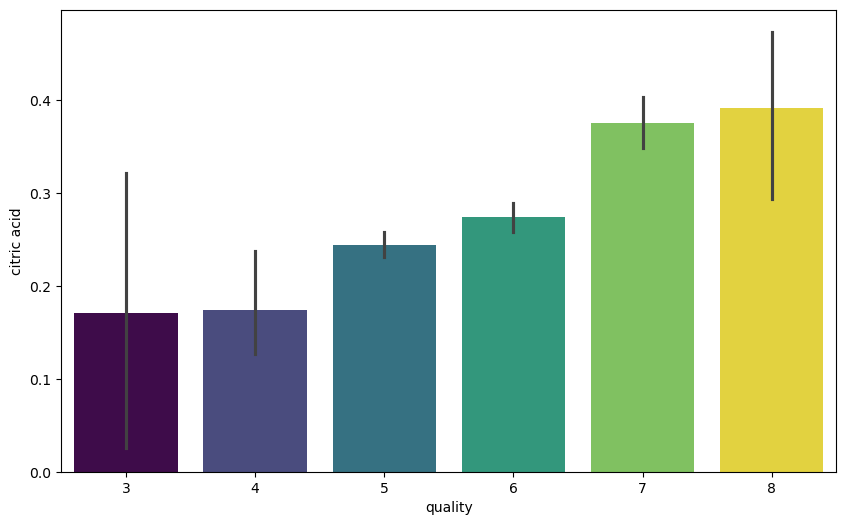

In [51]:
# Composition of citric acid go higher as we go higher in the quality of the wine
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality",y="citric acid",data=wine,hue="quality",legend=False,palette='viridis')

<Axes: xlabel='quality', ylabel='residual sugar'>

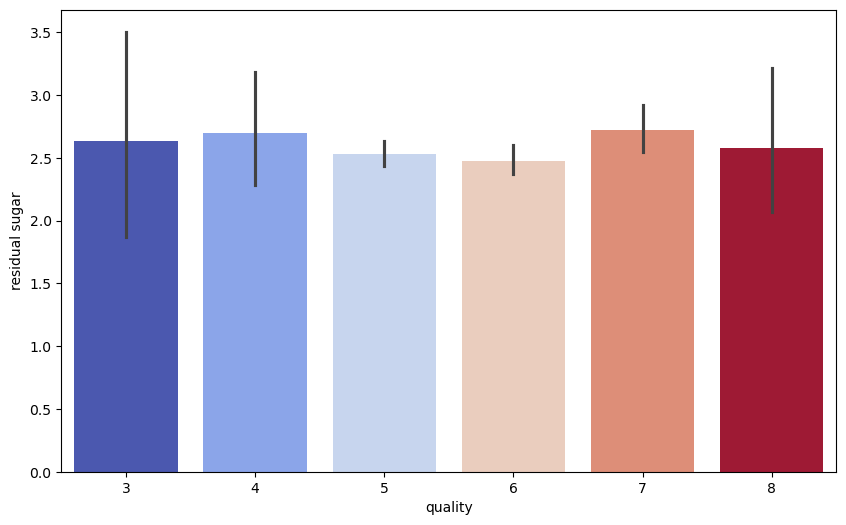

In [52]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine,hue='quality',legend=False,palette='coolwarm')
# Again this feature is useless as no trend

<Axes: xlabel='quality', ylabel='chlorides'>

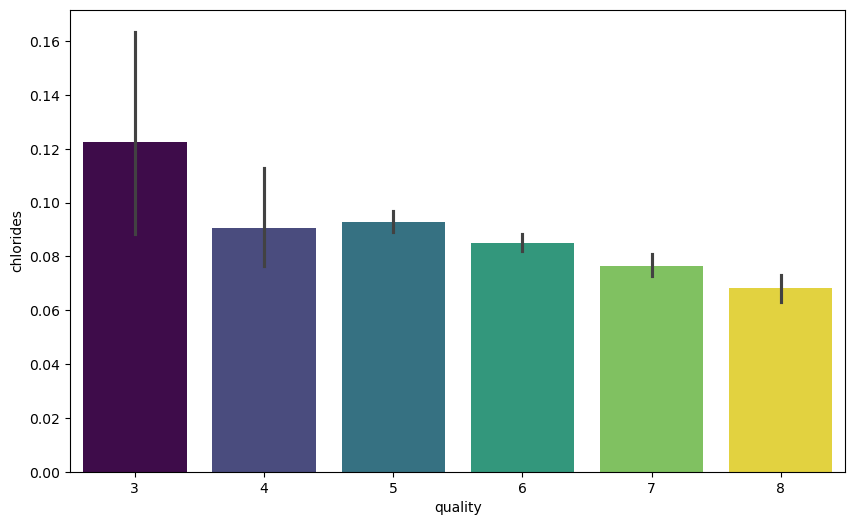

In [53]:
# Composition of chloride also go down as we go higher in the quality of wine
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality",y="chlorides",data=wine,hue="quality",legend=False,palette='viridis')

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

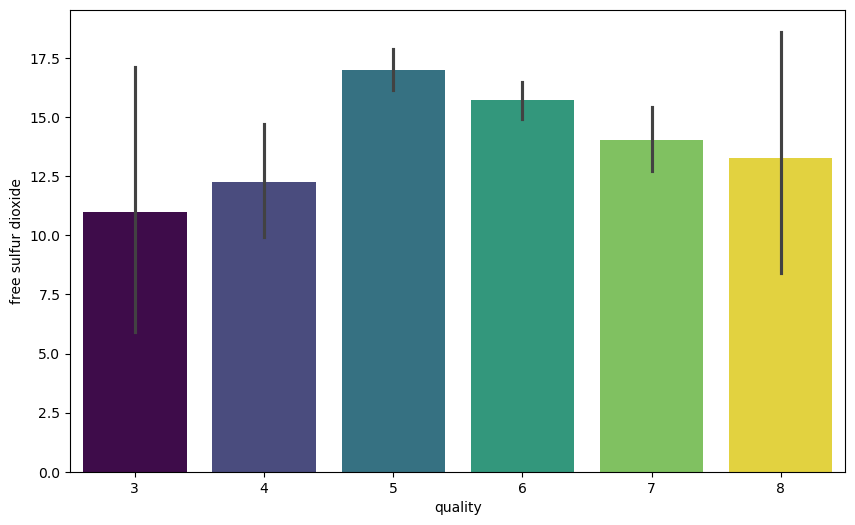

In [54]:
fig = plt.figure(figsize = (10,6))  # Again no trend=useless feature
sns.barplot(x ='quality', y = 'free sulfur dioxide', data = wine,hue="quality",legend=False,palette='viridis')

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

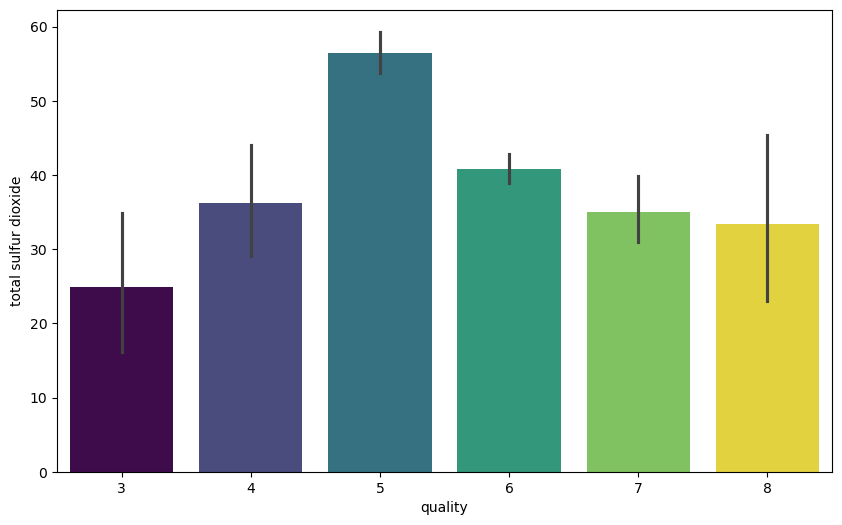

In [55]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine,hue="quality",legend=False,palette='viridis')

Figure(1000x600)


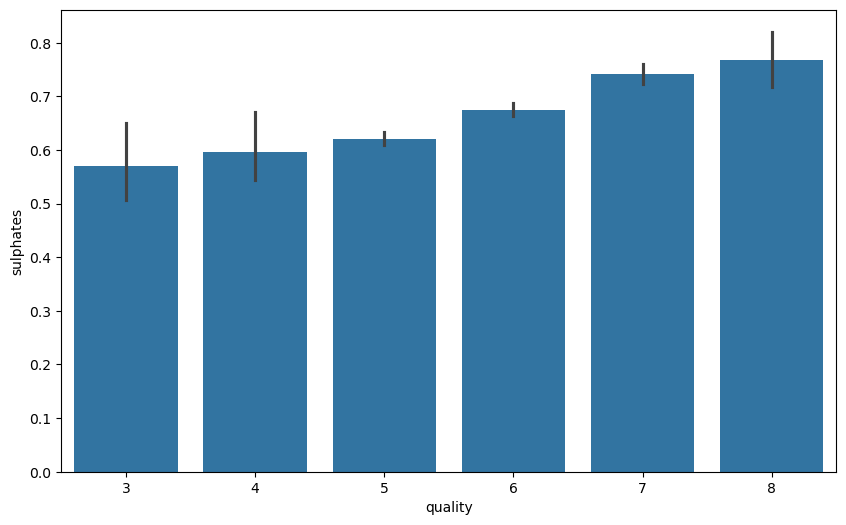

In [56]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
print(fig)

<Axes: xlabel='quality', ylabel='alcohol'>

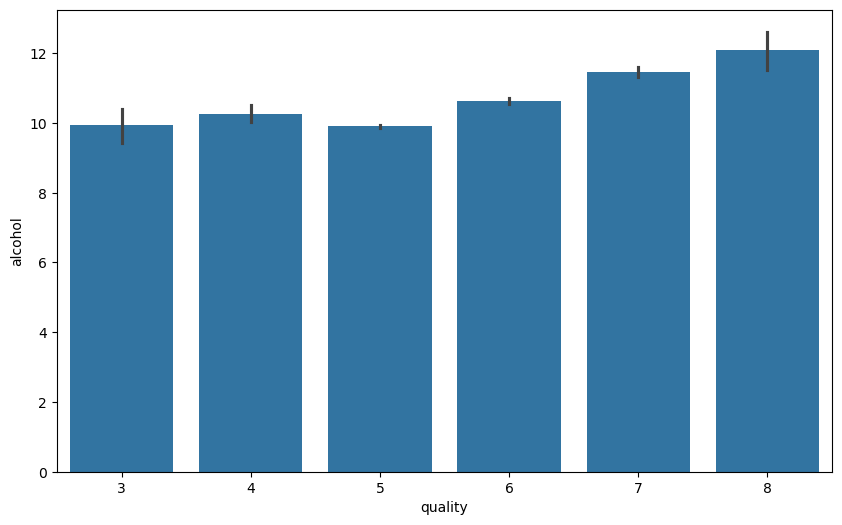

In [57]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# Preprocesing data for performing Machine learning algorithms

In [58]:
# Making binary classification for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)

In [59]:
wine['quality'].value_counts()

quality
bad     1382
good     217
Name: count, dtype: int64

In [60]:
# Now lets assign a labels to our quality variables
label_quality=LabelEncoder()

In [61]:
# Bad becomes 0 and good becomes 1
wine['quality']=label_quality.fit_transform(wine['quality'])

In [62]:
wine['quality']


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

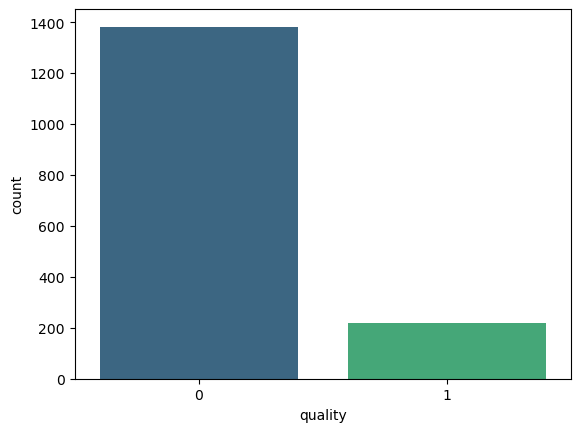

In [63]:
import seaborn as sns
sns.countplot(x='quality',data=wine,hue='quality',legend=False,palette='viridis')
plt.show()

In [64]:
# Now seperate the dataset as response variable and feature variables
X=wine.drop('quality',axis=1)
y=wine['quality']

In [65]:
# Train test splitting of data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
# Applying standardScaling to the numerical columns
sc=StandardScaler()

In [67]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Our training and testing data is ready now to perform machine learning algorithms
- Random Forest Classifier

In [68]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [69]:
# Let's see how our model performed
print(classification_report(y_test,pred_rfc))  # Gives a 90% of accuracy

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



In [70]:
# Confusion matrix for the random forest classification
print(confusion_matrix(y_test,pred_rfc))

[[264   9]
 [ 22  25]]


# Stochastic Gradient Descent classifier

In [71]:
sgd=SGDClassifier(penalty=None)
sgd.fit(X_train,y_train)
pred_sgd=sgd.predict(X_test)    

In [72]:
print(classification_report(y_test,pred_sgd))  # Gives 84% accuracy

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       273
           1       0.45      0.57      0.50        47

    accuracy                           0.83       320
   macro avg       0.69      0.73      0.70       320
weighted avg       0.85      0.83      0.84       320



In [73]:
print(confusion_matrix(y_test,pred_sgd))

[[240  33]
 [ 20  27]]


## Support Vector Classifier

In [74]:
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)

In [75]:
print(classification_report(y_test,pred_svc)) # 88% accuracy

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [76]:
# Finding best parameters for our SVC model
param={
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.8,0.9,1.1,1.2,1.3,1.4]
}
grid_svc=GridSearchCV(svc,param_grid=param,scoring='accuracy',cv=10)

In [77]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [78]:
# Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [80]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))  # Improves from 88% --> 90%

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.85      0.36      0.51        47

    accuracy                           0.90       320
   macro avg       0.88      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



In [81]:
# Now lets try to do some evaluation for random forest model using cross validation
rfc_eval=cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=10)
rfc_eval.mean()

np.float64(0.9108882874015748)